<a href="https://colab.research.google.com/github/rezendervp/chemical-engineering/blob/main/Smoke.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

smoke.info()
smoke.describe().T

In [ ]:
#Importando biblotecas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import cluster

# Apply the default theme
sns.set_theme()

# carregando dataset
smoke = sns.load_dataset("tips")


In [ ]:
smoke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
smoke.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [ ]:
smoke


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


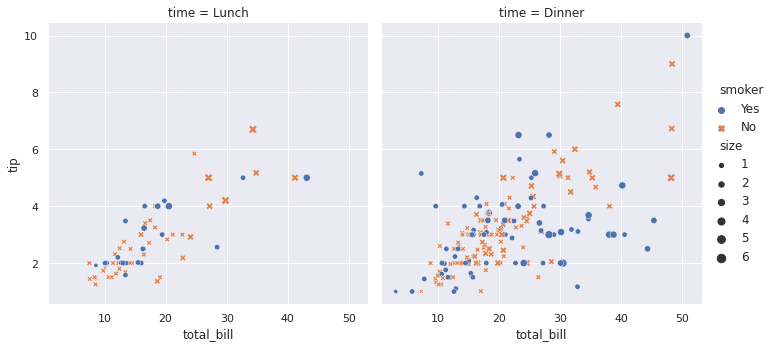

In [ ]:
# Plotando alguns dados
sns.relplot( data=smoke, x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

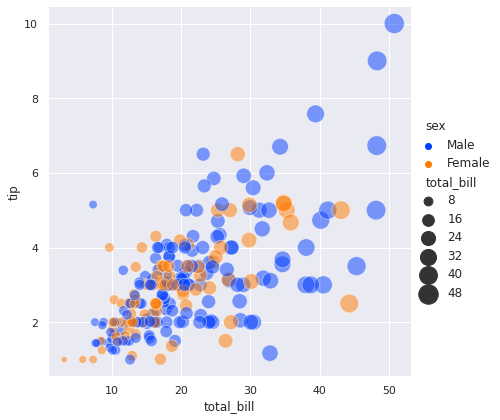

In [ ]:
#plotando mais alguns dados por categorias de sexo

sns.relplot(x="total_bill", y="tip", hue="sex",size="total_bill", s=100, sizes=(40, 400), alpha=.5,height=6, data=smoke,palette="bright")

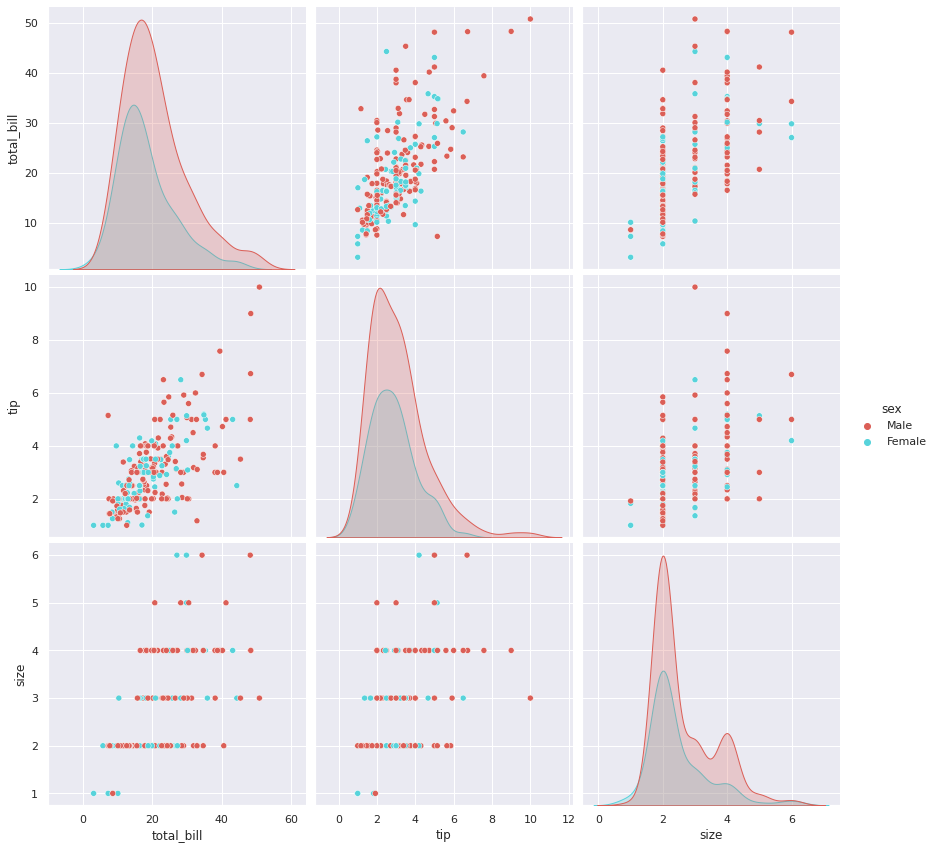

In [ ]:
#verificando o comportamento dos pares de variáveis

sns.pairplot(smoke,height=4,hue="sex",palette="hls")


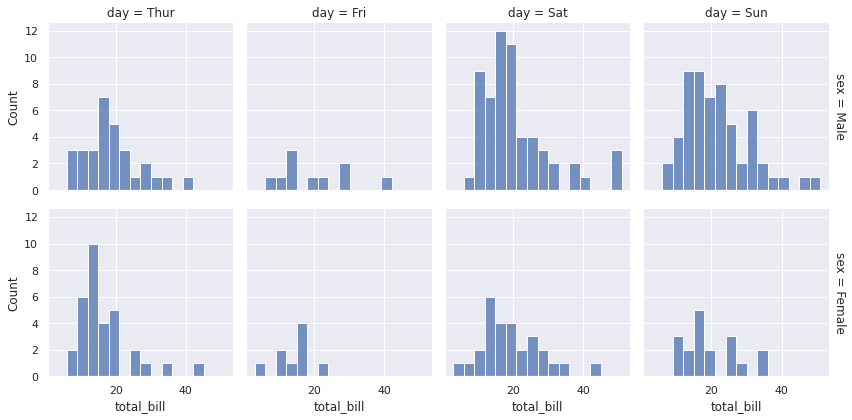

In [ ]:
# distribuição dos gastos por sexo e dias da semana

sns.displot(smoke, x="total_bill",col="day",row="sex", binwidth=3, height=3,facet_kws=dict(margin_titles=True))

In [ ]:
#criando um subconjunto de dados XY com base no que foi percebido

smoke2D_sex = data[['total_bill', 'tip']]


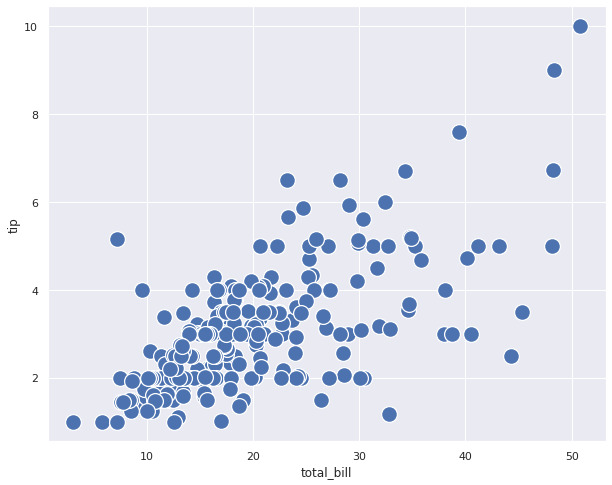

In [ ]:
#plotando estes dados
fig, axe = plt.subplots(figsize=(10,8))
axe = sns.scatterplot(data=smoke2D_sex, x='total_bill', y='tip',s=250)
plt.show()

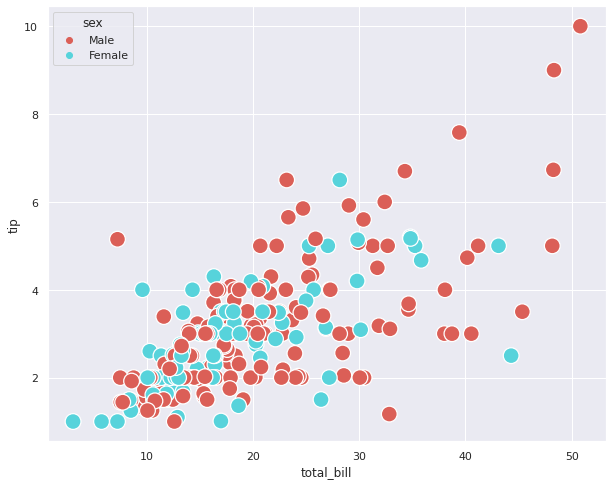

In [ ]:
#comparando com os do dataset original

fig, axe = plt.subplots(figsize=(10,8))
axe = sns.scatterplot(data=smoke, x='total_bill', y='tip',s=250,hue="sex",palette="hls")
plt.show()

In [ ]:
#alicando o modelo de clusterização K-Means
kmeans = cluster.KMeans(2)
clusters = kmeans.fit_predict(smoke2D_sex)

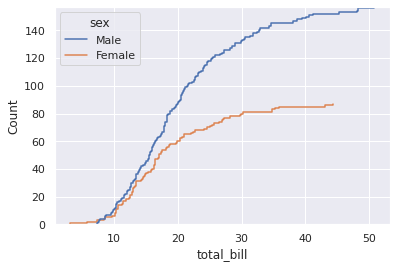

In [ ]:
sns.ecdfplot(data=smoke, x="total_bill",hue="sex", stat="count" )

In [ ]:
pd.value_counts(clusters)


0    176
1     68
dtype: int64

In [ ]:
x_center, y_center = kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1]


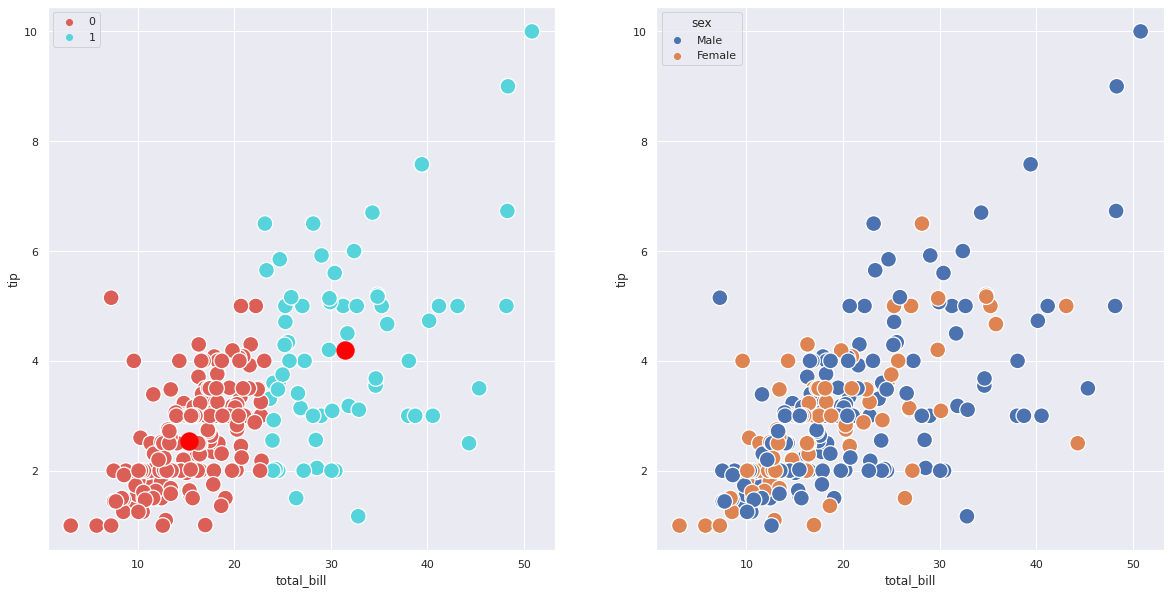

In [ ]:
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(20,10))

sns.scatterplot(data=smoke2D_sex, x='total_bill', y='tip', hue=clusters, ax=axis1,s=250,palette="hls")
axis1.scatter(x=x_center, y=y_center, s = 300, color='red')
sns.scatterplot(data=smoke, x='total_bill', y='tip', hue="sex", ax=axis2,s=250)
plt.show()

Há um grande erro na categorização. Os grupos são muito mesclados, praticamente não havendo uma diferença na distribuição entre homens e mulheres.

In [ ]:
Smoke_export_data=pd.DataFrame(data=smoke)
print(Smoke_export_data)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [ ]:
# Exporting data as a csv file
Smoke_export_data.to_csv('smoke.csv')

# Exporting data as a excel file
Smoke_export_data.to_excel('smoke.xlsx')